In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Scale features for clustering algorithms that rely on distance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

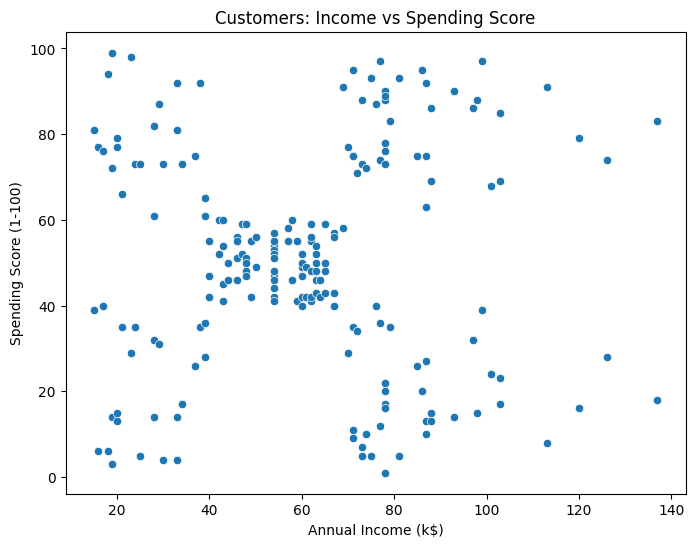

In [ ]:
# Visual exploration of original data
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customers: Income vs Spending Score')
plt.show()

In [ ]:
# Finding the optimal number of clusters using the elbow method and silhouette score
wcss = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method for Optimal k')

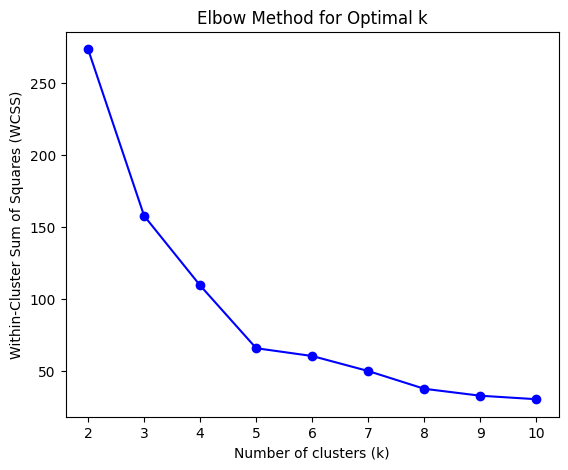

In [ ]:
# Plot elbow method
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')

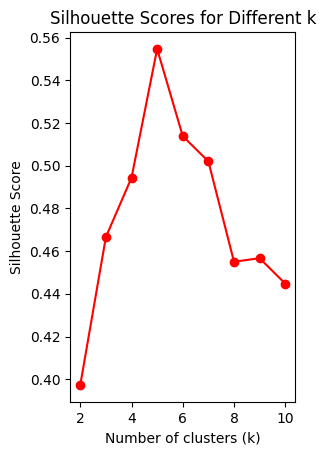

In [ ]:
# Plot silhouette scores
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

In [ ]:
optimal_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters by silhouette score: {optimal_k}")

# Apply K-Means with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Optimal number of clusters by silhouette score: 5


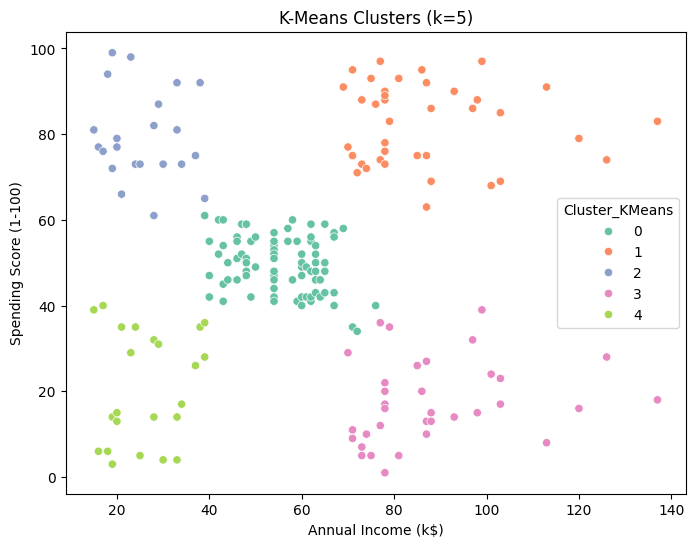

In [ ]:
# Add cluster info to original df
df['Cluster_KMeans'] = clusters

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster_KMeans', palette='Set2', data=df)
plt.title(f'K-Means Clusters (k={optimal_k})')
plt.show()

DBSCAN found 2 clusters (noise labeled as -1)


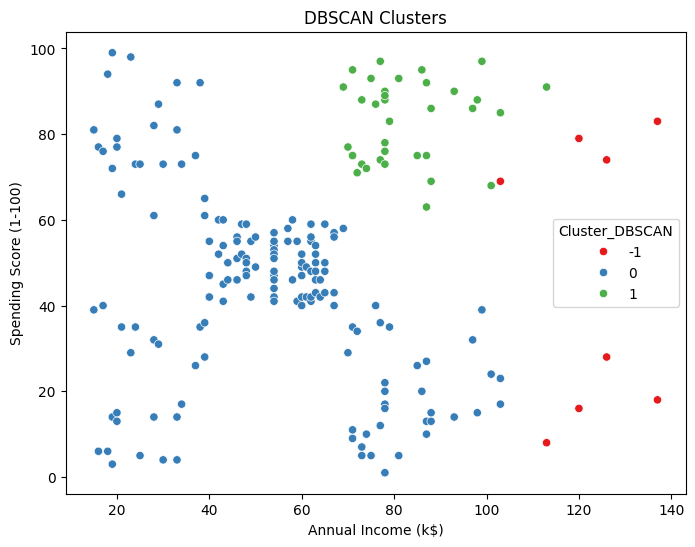

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

df['Cluster_DBSCAN'] = dbscan_clusters

# Number of clusters DBSCAN found (excluding noise labeled as -1)
n_dbscan_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print(f"DBSCAN found {n_dbscan_clusters} clusters (noise labeled as -1)")

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster_DBSCAN', palette='Set1', data=df)
plt.title('DBSCAN Clusters')
plt.show()

In [ ]:
# Analyze average spending score per K-Means cluster
avg_spending_kmeans = df.groupby('Cluster_KMeans')['Spending Score (1-100)'].mean()
print("Average Spending Score per K-Means Cluster:")
print(avg_spending_kmeans)

Average Spending Score per K-Means Cluster:
Cluster_KMeans
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


In [ ]:
# Analyze average spending score per DBSCAN cluster
avg_spending_dbscan = df[df['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN')['Spending Score (1-100)'].mean()
print("\nAverage Spending Score per DBSCAN Cluster (excluding noise):")
print(avg_spending_dbscan)


Average Spending Score per DBSCAN Cluster (excluding noise):
Cluster_DBSCAN
0    43.101911
1    82.800000
Name: Spending Score (1-100), dtype: float64
